# FordGoBike 2017


## by Prem Kumar.V.G



## Preliminary Wrangling

>bicycle-sharing systems is been growing in number and popularity in cities across the world. bicycle-sharing systems allow users to rent the bicycles as long as the users needs it.Bicycle-sharing systems have deployes new technologies like gps to track the distance,time etc.It is easy for a user to access a lock within the system to unlock or return bicycles.
In this project, I will perform an exploratory analysis on FordGoBike 2017 data.

# Gathering:

In [1]:
#importing python libraries that are required for this project
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import datetime
import calendar
%matplotlib inline

In [2]:
#FordGoBike 2017 data was downloaded from the https://s3.amazonaws.com/fordgobike-data/index.html and gathering the data here as df
df=pd.read_csv('2017-fordgobike-tripdata.csv')

# Accessing:

In [3]:
#making a copy of original file for better reference
df_clean=df.copy()
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [5]:
#here we are looking at the shape of our data
df_clean.shape

(519700, 15)

In [6]:
#here we are looking at the information of our data
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 59.5+ MB


In [7]:
#here we are looking at the null values presented in our data
df_clean.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id               0
start_station_name             0
start_station_latitude         0
start_station_longitude        0
end_station_id                 0
end_station_name               0
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
member_birth_year          66541
member_gender              66462
dtype: int64

# Cleaning: 

**Quality issue:**

1-bike_id column is type int need to convert to str.

2-duration_sec from int to time

2-start_time and end_time is type str need to convert to datetime.

3-start_station_id and end_station_id is type int need to convert to str.

4-member_birth_year and member_gender has null values need to drop all the null values.

5-member_birth_year is type float need to convert to int.

**Quality:**
--

**Define:**
--

**1-bike_id column is type int need to convert to str.**

**Code:**
--

In [8]:
#bike_id of the data was in int, here we are converting the int values to the str
df_clean['bike_id']=df_clean['bike_id'].astype(str)

**Test:**
--

In [9]:
#testing the code
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null object
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: float64(5), int64(3), object(7)
memory usage: 59.5+ MB


**Define:**
--

**2-start_time and end_time is type str need to convert to datetime**

**Code:**
--

In [10]:
#in our data both start_time and end_time columns are in str,the acttual type is datetime. we are converting the both the columns here
df_clean['start_time']=pd.to_datetime(df_clean['start_time'],format='%Y-%m-%d %H:%M:%S')

In [11]:
df_clean['end_time']=pd.to_datetime(df_clean['end_time'],format='%Y-%m-%d %H:%M:%S')

**Test:**
--

In [12]:
#testing the code
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null datetime64[ns]
end_time                   519700 non-null datetime64[ns]
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null object
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: datetime64[ns](2), float64(5), int64(3), object(5)
memory usage: 59.5+ MB


**Define:**
--

**3-start_station_id and end_station_id is type int need to convert to str:**

**Code:**
--

In [13]:
#in our data start_station_id and end_station_id are type int,here we are converting it to str.
df_clean['start_station_id']=df_clean['start_station_id'].astype(str)

In [14]:
df_clean['end_station_id']=df_clean['end_station_id'].astype(str)

**Test:**
--

In [15]:
#testing the code
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null datetime64[ns]
end_time                   519700 non-null datetime64[ns]
start_station_id           519700 non-null object
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null object
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null object
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: datetime64[ns](2), float64(5), int64(1), object(7)
memory usage: 59.5+ MB


**Define:**
--

**4-member_birth_year and member_gender has null values need to drop all the null values:**

**Code:**
--

In [16]:
#here we are going to drop all the null values that are presented in our dataset
df_clean.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id               0
start_station_name             0
start_station_latitude         0
start_station_longitude        0
end_station_id                 0
end_station_name               0
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
member_birth_year          66541
member_gender              66462
dtype: int64

In [17]:
df_clean.dropna(inplace=True)

**Test:**
--

In [18]:
#testing the code
df_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
dtype: int64

In [19]:
#in our data member_birth_year is type float,here we are converting it to int.
df_clean['member_birth_year']=df_clean['member_birth_year'].astype('int64')

In [22]:
#testing the code
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453159 entries, 0 to 519699
Data columns (total 16 columns):
duration_sec               453159 non-null int64
start_time                 453159 non-null datetime64[ns]
end_time                   453159 non-null datetime64[ns]
start_station_id           453159 non-null object
start_station_name         453159 non-null object
start_station_latitude     453159 non-null float64
start_station_longitude    453159 non-null float64
end_station_id             453159 non-null object
end_station_name           453159 non-null object
end_station_latitude       453159 non-null float64
end_station_longitude      453159 non-null float64
bike_id                    453159 non-null object
user_type                  453159 non-null object
member_birth_year          453159 non-null int64
member_gender              453159 non-null object
distance_km                453159 non-null float64
dtypes: datetime64[ns](2), float64(5), int64(2), object(7)
memory usag

**Distance travelled by the users:**
--

In [21]:
#here with the help of pythons geopy library we are going to calcculate the the distance travelled by the customers and subcriber
#with the help of start_station_latitude,start_station_longitude,end_station_latitude and end_station_longitude
from geopy.distance import vincenty

def distance_calc (row):
    start = (row['start_station_latitude'], row['start_station_longitude'])
    stop = (row['end_station_latitude'], row['end_station_longitude'])

    return vincenty(start, stop).km

df_clean['distance_km'] = df_clean.apply (lambda row: distance_calc (row),axis=1)

C:\Users\Prem Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  if __name__ == '__main__':


In [23]:
#testing the code
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,distance_km
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987,Male,0.944876
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965,Female,3.071144
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997,Female,0.637772
6,4507,2017-12-31 23:49:28.422,2018-01-01 01:04:35.619,259,Addison St at Fourth St,37.866249,-122.299371,259,Addison St at Fourth St,37.866249,-122.299371,3539,Customer,1991,Female,0.000000
12,2183,2017-12-31 23:52:55.581,2018-01-01 00:29:18.743,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24,Spear St at Folsom St,37.789677,-122.390428,2311,Subscriber,1990,Male,1.515141


**Age Calculation:**
--

In [24]:
#here we are creating a new colum called member_age and calculating the age ofevery customers and suscribers age.
df_clean['member_age']=2017-df_clean['member_birth_year']

In [25]:
#testing the code
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,distance_km,member_age
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987,Male,0.944876,30
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965,Female,3.071144,52
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997,Female,0.637772,20
6,4507,2017-12-31 23:49:28.422,2018-01-01 01:04:35.619,259,Addison St at Fourth St,37.866249,-122.299371,259,Addison St at Fourth St,37.866249,-122.299371,3539,Customer,1991,Female,0.000000,26
12,2183,2017-12-31 23:52:55.581,2018-01-01 00:29:18.743,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24,Spear St at Folsom St,37.789677,-122.390428,2311,Subscriber,1990,Male,1.515141,27


In [26]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453159 entries, 0 to 519699
Data columns (total 17 columns):
duration_sec               453159 non-null int64
start_time                 453159 non-null datetime64[ns]
end_time                   453159 non-null datetime64[ns]
start_station_id           453159 non-null object
start_station_name         453159 non-null object
start_station_latitude     453159 non-null float64
start_station_longitude    453159 non-null float64
end_station_id             453159 non-null object
end_station_name           453159 non-null object
end_station_latitude       453159 non-null float64
end_station_longitude      453159 non-null float64
bike_id                    453159 non-null object
user_type                  453159 non-null object
member_birth_year          453159 non-null int64
member_gender              453159 non-null object
distance_km                453159 non-null float64
member_age                 453159 non-null int64
dtypes: datetime64[ns

**DateTime Extraction:**
--

In [27]:
#we are extracting only date from the column start_time and storing into start_date
df_clean['start_date']=df_clean['start_time'].dt.date

In [28]:
#testing the code
df_clean.start_date.head()

0     2017-12-31
1     2017-12-31
4     2017-12-31
6     2017-12-31
12    2017-12-31
Name: start_date, dtype: object

In [29]:
#we are extracting only date from the column end_time and storing into end_date
df_clean['end_date']=df_clean['end_time'].dt.date

In [30]:
#testing the code
df_clean.end_date.head()

0     2018-01-01
1     2018-01-01
4     2018-01-01
6     2018-01-01
12    2018-01-01
Name: end_date, dtype: object

In [31]:
#we are extracting only year and month from the column start_time and storing into start_year_month
df_clean['start_year_month']=df_clean['start_time'].dt.strftime('%y' + '-' + '%m')

In [32]:
#testing the code
df_clean.start_year_month.head()

0     17-12
1     17-12
4     17-12
6     17-12
12    17-12
Name: start_year_month, dtype: object

In [33]:
#we are extracting only year and month from the column end_time and storing into end_year_month
df_clean['end_year_month']=df_clean['end_time'].dt.strftime('%y' + '-' + '%m')

In [34]:
#testing the code
df_clean.end_year_month.head()

0     18-01
1     18-01
4     18-01
6     18-01
12    18-01
Name: end_year_month, dtype: object

In [35]:
#we are extracting only year from the column start_time and storing into start_year
df_clean['start_year']=df_clean['start_time'].dt.year.astype(int)

In [36]:
#testing the code
df_clean.start_year.head()

0     2017
1     2017
4     2017
6     2017
12    2017
Name: start_year, dtype: int32

In [37]:
#we are extracting only year from the column start_time and storing into start_year
df_clean['end_year']=df_clean['end_time'].dt.year.astype(int)

In [38]:
#testing the code
df_clean['end_year'].head()

0     2018
1     2018
4     2018
6     2018
12    2018
Name: end_year, dtype: int32

In [39]:
#we are extracting only month from the column start_time and storing into start_month
df_clean['start_month']=df_clean['start_time'].dt.month

In [40]:
#testing the code
df_clean.start_month.head()

0     12
1     12
4     12
6     12
12    12
Name: start_month, dtype: int64

In [41]:
#we are extracting only month from the column end_time and storing into end_month
df_clean['end_month']=df_clean['end_time'].dt.month

In [42]:
#testing the code
df_clean.end_month.head()

0     1
1     1
4     1
6     1
12    1
Name: end_month, dtype: int64

In [43]:
#we are extracting only hour from the column start_time and storing into start_hour
df_clean['start_hour']=df_clean['start_time'].dt.hour

In [44]:
#testing the code
df_clean['start_hour'].head()

0     16
1     15
4     14
6     23
12    23
Name: start_hour, dtype: int64

In [45]:
#we are extracting only hour from the column end_time and storing into end_hour
df_clean['end_hour']=df_clean['end_time'].dt.hour

In [46]:
#testing the code
df_clean.end_hour.head()

0     15
1     13
4      2
6      1
12     0
Name: end_hour, dtype: int64

In [47]:
#we are extracting only weekday in str format from the column start_time and storing into start_weekday
df_clean['start_weekday']=df_clean['start_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])

In [50]:
#testing the code
df_clean.start_weekday.head()

0     Sun
1     Sun
4     Sun
6     Sun
12    Sun
Name: start_weekday, dtype: object

In [48]:
#we are extracting only weekday in str format from the column end_time and storing into end_weekday
df_clean['end_weekday']=df_clean['end_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])

In [49]:
#testing the code
df_clean.end_weekday.head()

0     Mon
1     Mon
4     Mon
6     Mon
12    Mon
Name: end_weekday, dtype: object

### What is the structure of your dataset?

> There are 453159 rows in the dataset with 17 columns like bike_id, user_type, member_age, start_station_name etc. 

### What is/are the main feature(s) of interest in your dataset?

> I am interested in plotting and understanding the users' behaviors and personal details like;
    
    Average riding duration
    
    Average riding distance etc... in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>  From the dataset features like age groups,gender,user,distance travelled,time will help investigating the data.

**Univariate plotting:**
--

**In Univairate plotting we are going to visualize only one variable.**

**How many Subcribers and Customers are there in the FordGoBike are there?**
--

**To find this result we are going to use the countplot/barplot for visualization:**

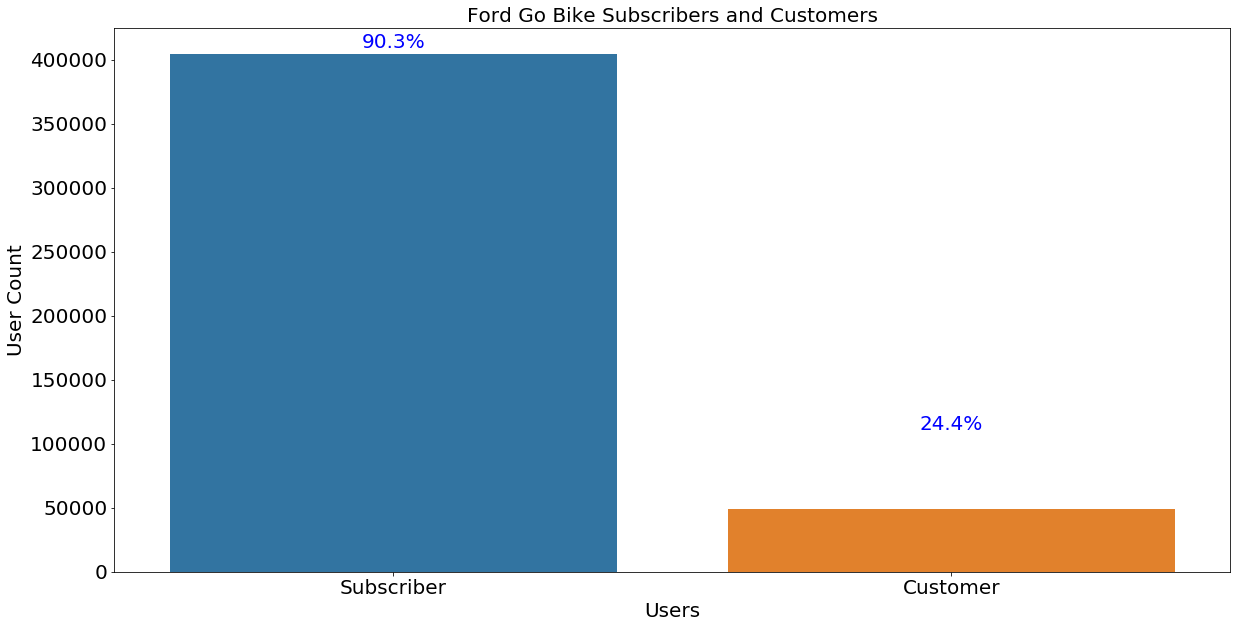

In [51]:
#plotting the user_type column from the data to find number of subscribers and customers
plt.figure(figsize=(20,10));
user_order=df_clean.user_type.value_counts().index
sb.countplot(data=df_clean,x='user_type',order=user_order);
plt.xlabel('Users',fontsize=20);
plt.ylabel('User Count',fontsize=20)
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.title('Ford Go Bike Subscribers and Customers',fontsize=20);

n_points = df_clean.shape[0]
cat_counts = df['user_type'].value_counts()
locs, labels = plt.xticks() 
for loc, label in zip(locs, labels):

    
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'b',fontsize=20)

**Result:**
--
Upon visualisation the FordGoBike has 90.3% subscriber where 24.4% are customers. 

**How many Male anf Female are there:**
--
**To find this result we are going to use the countplot/barplot for visualization:**

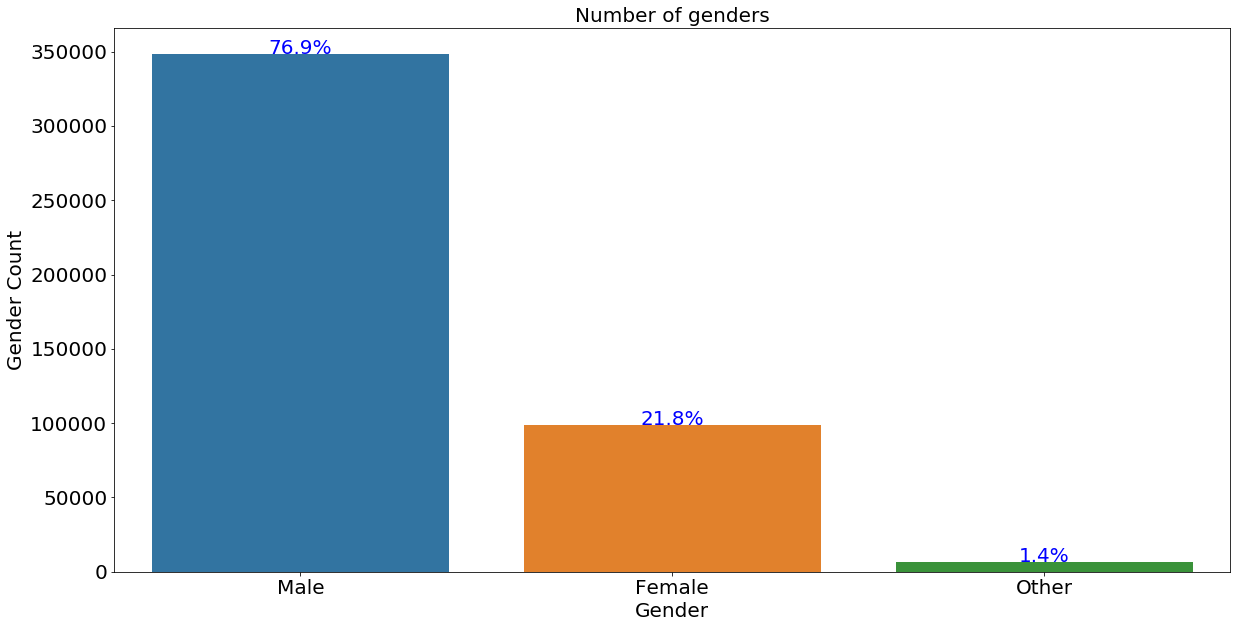

In [52]:
#plotting the member_gender column from the data to find number of male and female
plt.figure(figsize=(20,10));
user_order=df_clean.member_gender.value_counts().index
sb.countplot(data=df_clean,x='member_gender',order=user_order);
plt.xlabel('Gender',fontsize=20);
plt.ylabel('Gender Count',fontsize=20)
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.title('Number of genders',fontsize=20);

n_points = df_clean.shape[0]
cat_counts = df['member_gender'].value_counts()
locs, labels = plt.xticks() 
for loc, label in zip(locs, labels):

    
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'b',fontsize=20)

**Result:**
--
Upon visualisation the FordGoBike has 76.9% of Male customers,21.8% of female Customers and others customers are 1.4%.

**How many bike rides are done per month?**
--
**To find this result we are going to use the countplot/barplot for visualization:**

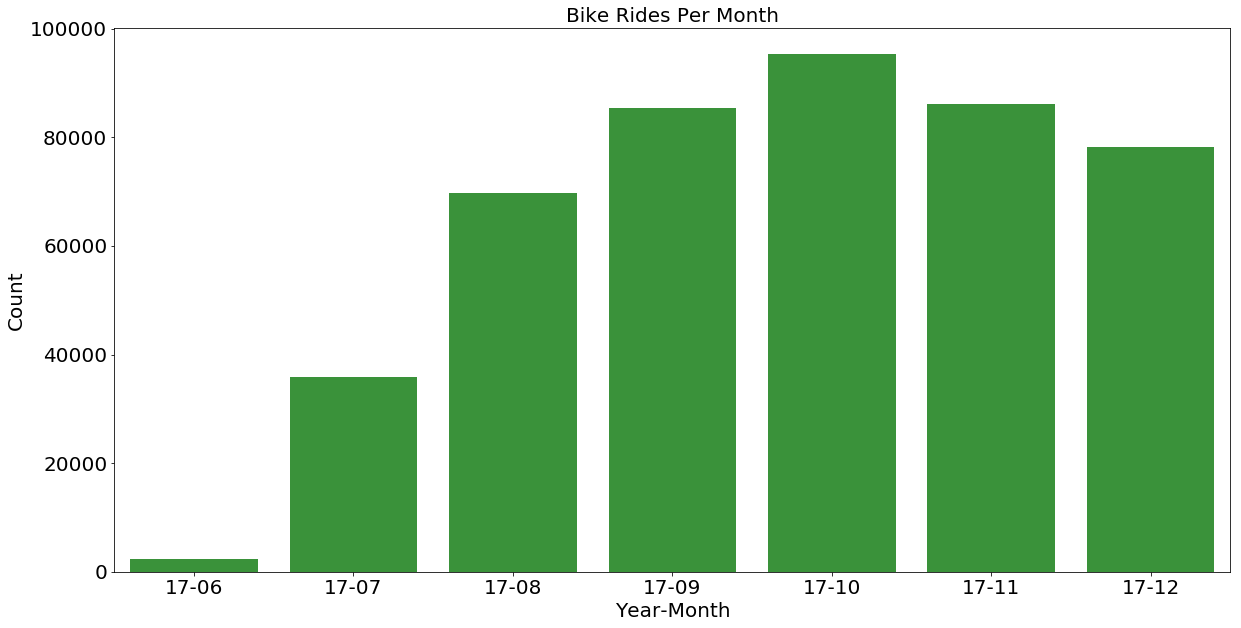

In [53]:
#plotting the start_year_month from the data to find the number of bike rides in every month
plt.figure(figsize=(20,10));
base_color=sb.color_palette()[2]
sb.countplot(data=df_clean.sort_values(by='start_year_month'),x='start_year_month',color=base_color);
plt.xlabel('Year-Month',fontsize=20);
plt.ylabel('Count',fontsize=20)
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.title('Bike Rides Per Month',fontsize=20);


**Result:**
--
Upon visualisation the FordGoBike has 76.9% of Male customers,21.8% of female Customers and others customers are 1.4%.

**what Age Customers are there?**
--
**To find this result we are going to use the countplot/barplot for visualization:**

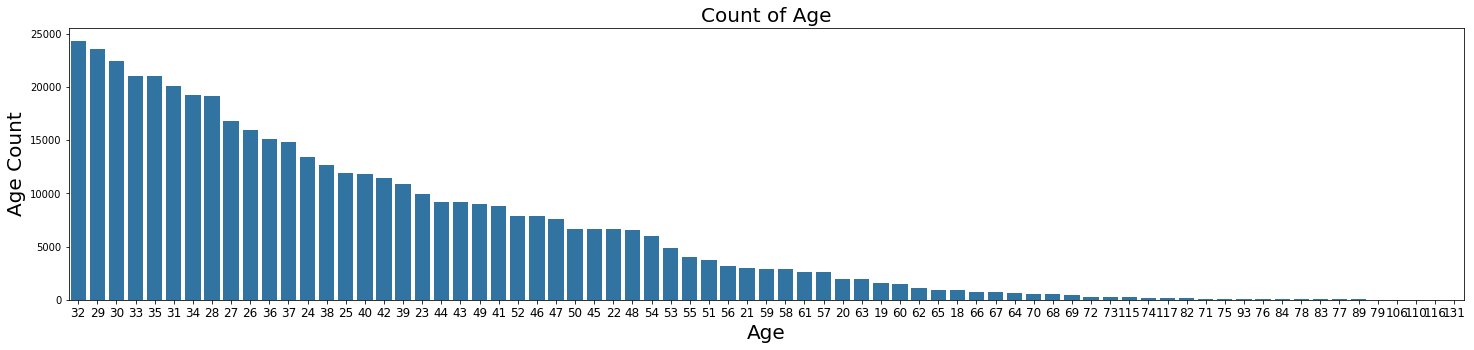

In [54]:
#plotting the member_age column from the data to find the major and minor age groups
plt.figure(figsize=(25,5));
base_color=sb.color_palette()[0]
user_order=df_clean.member_age.value_counts().index
sb.countplot(data=df_clean,x='member_age',color=base_color,order=user_order);
plt.xlabel('Age',fontsize=20);
plt.ylabel('Age Count',fontsize=20)
plt.xticks(fontsize=12);
plt.yticks(fontsize=10);
plt.title('Count of Age',fontsize=20);

**Result:**
--
Upon visualisation the FordGoBike customers of age 32 are more and least count of age 82. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> my observation was on independent variables which mean a single variable. as i have plotted for the user types in this plotting i observed that number of subcribers are more than customers. under genders column the male gender is more than other genders. according to the univariate visualization the business is runs mainly on the subscribers. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> yes i have made some cleaning process and calculations. bike_id,start and end id column was int converted to str, start and end columns were str converted to datetime and there where some null values i dropped it. i calculated the age, the distance travelled by a user and extracted time into many parts. i did this because for the future greater visualization.

**Bivariate Plotting:**
--

**In Bivariate plotting we are going to plot two variable.**

**Age Count for the Genders.**
--
**To find this result we are going to use the Violinplot for visualization:**

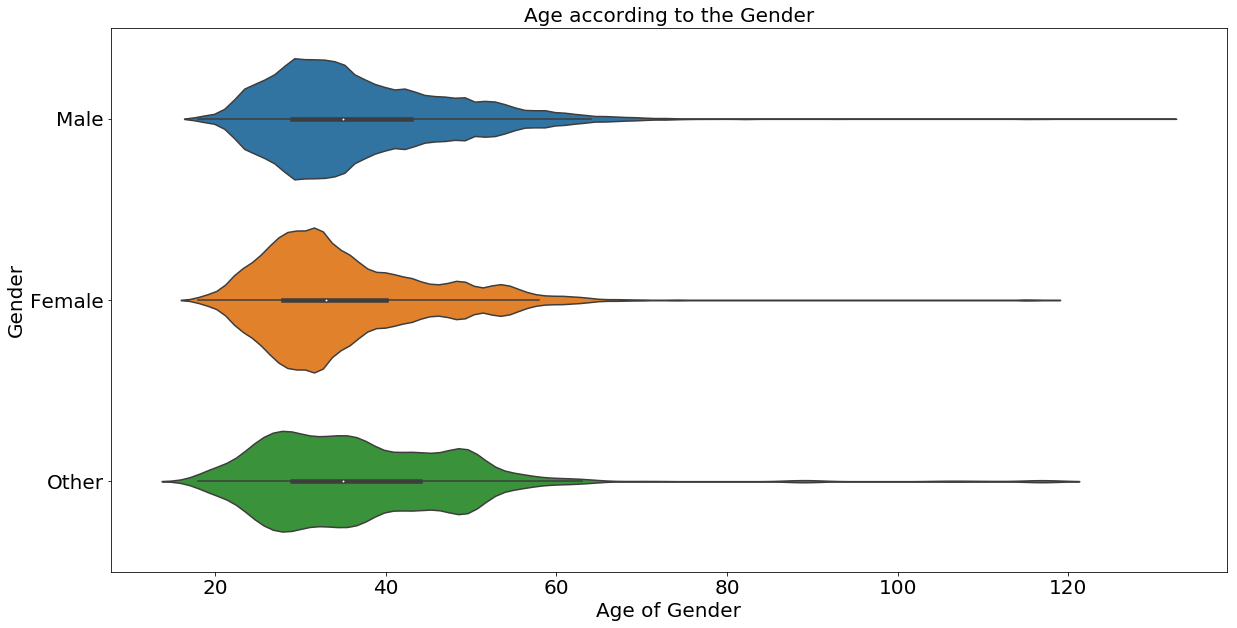

In [55]:
#plotting the member_gender and member_age columns from the data to find which gender are more according to the age groups
plt.figure(figsize=(20,10));
sb.violinplot(data=df_clean,y='member_gender',x='member_age');
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.xlabel('Age of Gender',fontsize=20);
plt.ylabel('Gender',fontsize=20);
plt.title('Age according to the Gender',fontsize=20);

**Result:**
--
Upon visualisation the FordGoBike the genders are unique at the age 30,Female customers are more between the age 30-40,Male customers are mre between the age 30-45 and other are between 30-50.

**Age Count for the User Types.**
--
**To find this result we are going to use the Boxplot for visualization:**

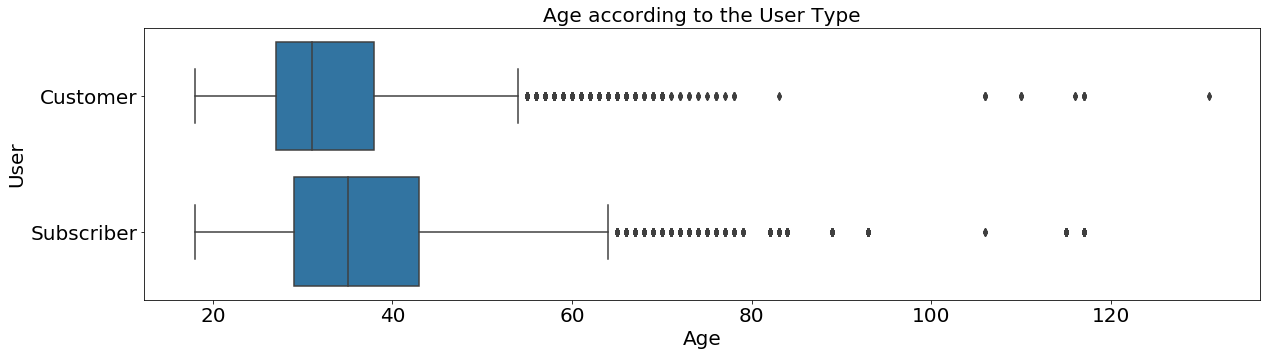

In [56]:
#plotting the user_type and member_age columns from the data to find which users are more according to the age groups
base_color = sb.color_palette()[0]
plt.figure(figsize=(20,5));
sb.boxplot(data = df_clean, x = 'member_age', y = 'user_type', color = base_color);
plt.title('Age according to the User Type',fontsize=20);
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.xlabel('Age',fontsize=20);
plt.ylabel('User',fontsize=20);

**Result:**
--
Upon visualisation the FordGoBike the user type customer the minimum age is 18 maximum age is 50 and medium age is 30. And user type Subscriber the minimum age is 18 maximum age is 70 and medium age is between 30-40.

**Gender Count according to the User Type**
--
**To find this result we are going to use the clustered barplot for visualization:**

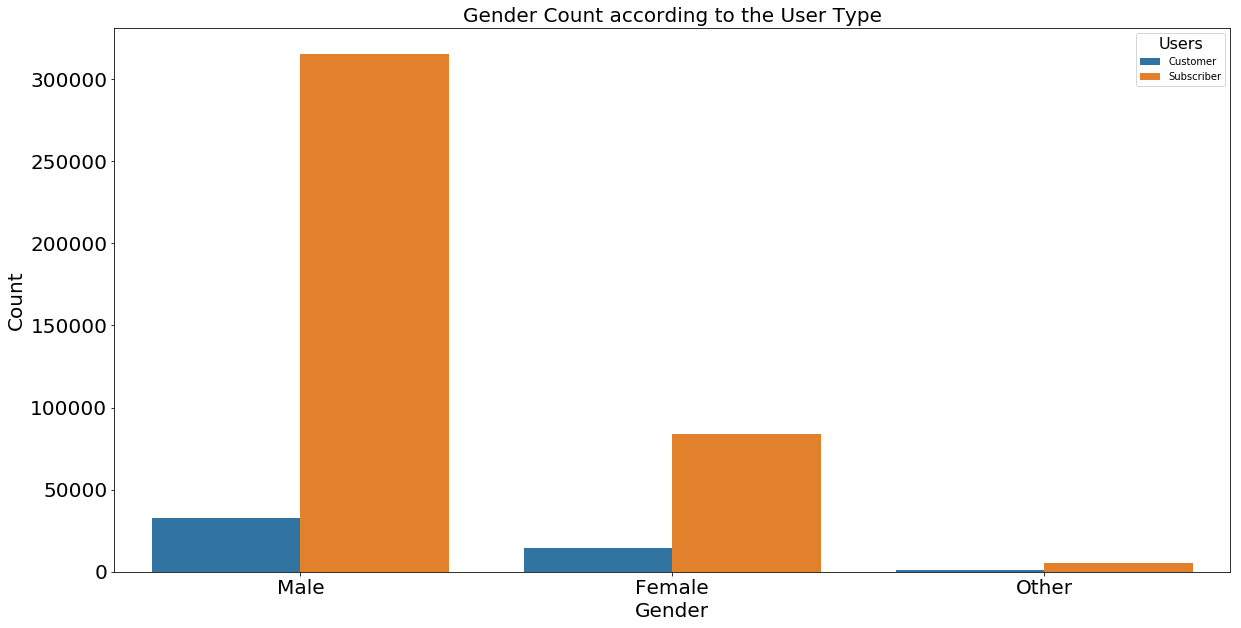

In [57]:
#plotting the user_type and member_age columns from the data to find which gender are more according to the user types
plt.figure(figsize=(20,10));
ax=sb.countplot(data = df_clean, x = 'member_gender', hue = 'user_type');
plt.title('Gender Count according to the User Type',fontsize=20);
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.xlabel('Gender',fontsize=20);
plt.ylabel('Count',fontsize=20);
leg = ax.legend()
leg.set_title('Users',prop={'size':16})
ax = plt.gca()

**Result:**
--
Upon visualisation the FordGoBike the Subcribers are more in all the genders than customers.

**Month wise usage from the User Type.**
--
**To find this result we are going to use the clustered barplot for visualization:**

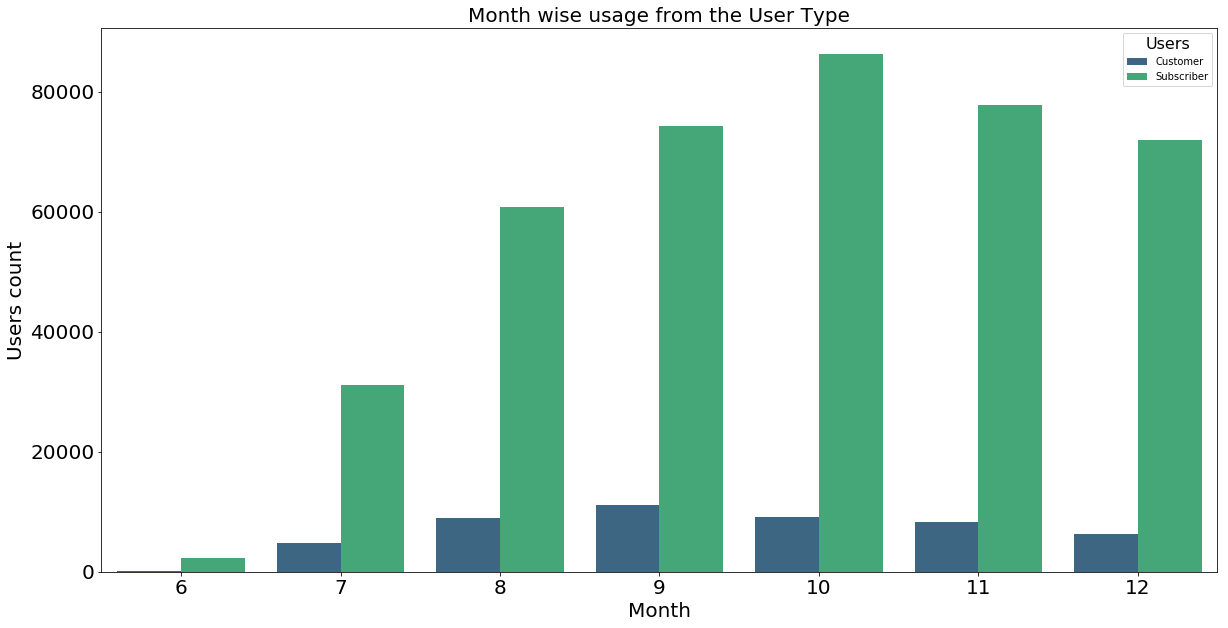

In [58]:
#plotting the user_type and start_month columns from the data to find which users have more usage in every month
plt.figure(figsize=(20,10));
ax=sb.countplot(data = df_clean, x = 'start_month',hue='user_type', palette = "viridis");
plt.title('Month wise usage from the User Type',fontsize=20);
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.xlabel('Month',fontsize=20);
plt.ylabel('Users count',fontsize=20);
leg = ax.legend()
leg.set_title('Users',prop={'size':16})
ax = plt.gca()

**Result:**
--
Upon visualisation the FordGoBike the subscriber in the month 10 are more usage of bikes and customers in the month 9 are more usage of bikes.

**Weekly Usage of FordGoBikes from the Users**
--
**To find this result we are going to use the clustered barplot for visualization:**

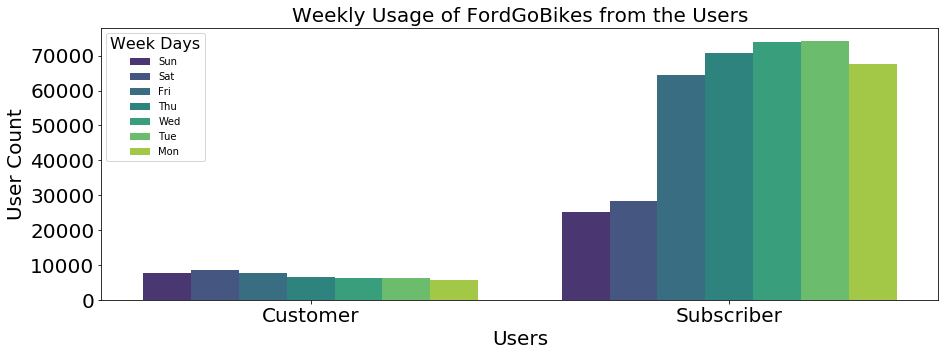

In [59]:
#plotting the user_type and start_weekday columns from the data to find which users have more usage in a week
plt.figure(figsize=(15,5));
ax=sb.countplot( data = df_clean,x = "user_type", palette = "viridis", hue = "start_weekday");
plt.title('Weekly Usage of FordGoBikes from the Users',fontsize=20);
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.xlabel('Users',fontsize=20);
plt.ylabel('User Count',fontsize=20);
leg = ax.legend()
leg.set_title('Week Days',prop={'size':16})
ax = plt.gca()

**Result:**
--
Upon visualisation the FordGoBike the customers uses the bike more in saturdays and subcriber have unique usages of bike on wednesday and thursday.

**The monthly trend of FordGobikes rides per Gender**
--
**To find this result we are going to use the pointplot for visualization:**

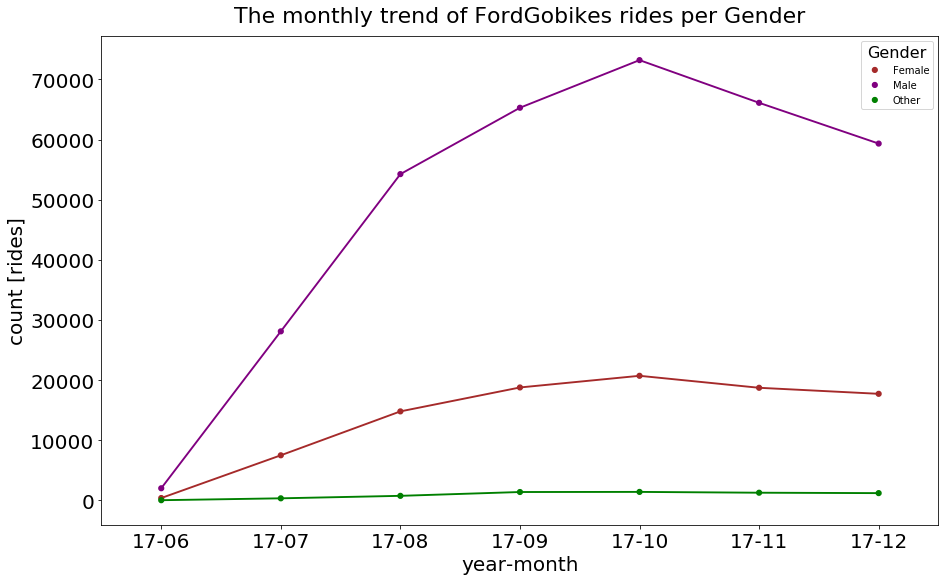

In [60]:
#grouping start_year_month and member_gender columns and plotting them from the data to find which gender has more usage of bike rides
gender_df = df_clean.groupby(["start_year_month", 'member_gender']).size().reset_index()
plt.figure(figsize=(15,9))
my_palette = {'Male':'purple', 'Female':'brown','Other':'green'}
ax = sb.pointplot(x='start_year_month', y=0, hue='member_gender', palette=my_palette, scale=.7, data=gender_df)
plt.title('The monthly trend of FordGobikes rides per Gender', fontsize=22, y=1.015)
plt.xlabel('year-month',fontsize=20)
plt.ylabel('count [rides]',fontsize=20)
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
leg = ax.legend()
leg.set_title('Gender',prop={'size':16})
ax = plt.gca()

**Result:**
--
Upon visualisation the FordGoBike,every month male genders have used more than 70000 rides and female genders have used 13000 rides and others have least count of rides.

**The monthly trend of FordGobikes rides per user type**
--
**To find this result we are going to use the Pointplot for visualization:**

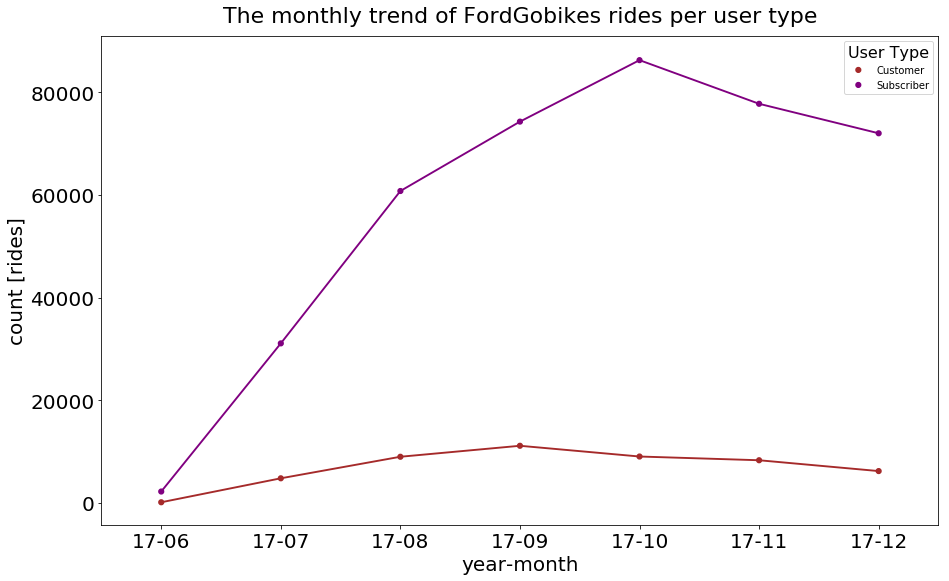

In [61]:
#grouping start_year_month and user_type columns and plotting them from the data to find which users has more usage of bike rides
type_df = df_clean.groupby(["start_year_month", 'user_type']).size().reset_index()
plt.figure(figsize=(15,9))
my_palette = {'Subscriber':'purple', 'Customer':'brown'}
ax = sb.pointplot(x='start_year_month', y=0, hue='user_type', palette=my_palette, scale=.7, data=type_df)
plt.title('The monthly trend of FordGobikes rides per user type', fontsize=22, y=1.015)
plt.xlabel('year-month',fontsize=20)
plt.ylabel('count [rides]',fontsize=20)
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
leg = ax.legend()
leg.set_title('User Type',prop={'size':16})
ax = plt.gca()

**Result:**
--
Upon visualisation the FordGoBike the subcribers are more than customers.

**PerDay Usage of Bikes according to the genders in 2017**
--
**To find this result we are going to use the Boxplot for visualization:**

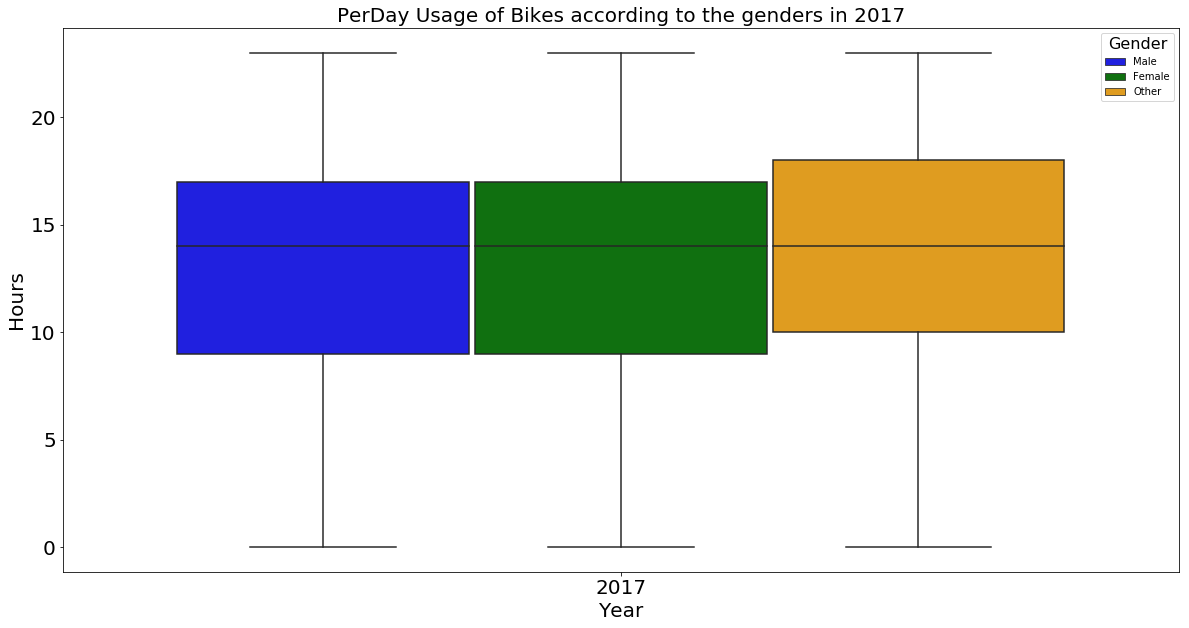

In [63]:
#plotting start_year and start_hour columns with member_gender column which gender has used the ride at what time period 
#the rides of the whole year.
plt.figure(figsize=(20,10))
ax=sb.boxplot(x='start_year', y='start_hour',hue='member_gender', palette=['blue', 'green','orange'],data=df_clean);
plt.title('PerDay Usage of Bikes according to the genders in 2017',fontsize=20);
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.xlabel('Year',fontsize=20);
plt.ylabel('Hours',fontsize=20);
leg = ax.legend()
leg.set_title('Gender',prop={'size':16})
ax = plt.gca()

**Result:**
--
Upon visualisation the FordGoBike, The Female and Male genders have unique start time in the year 2017.the start time is between 10 Am -17 Pm

**WeekDays Usage of Bikes according to the genders**
--
**To find this result we are going to use the Boxplot for visualization:**

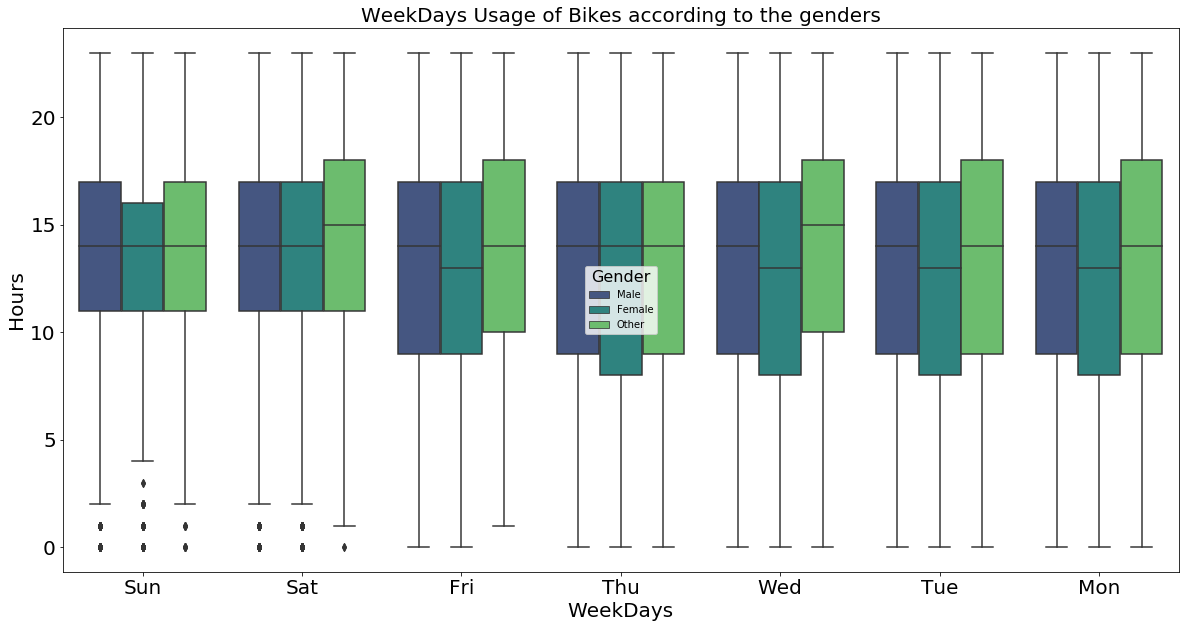

In [64]:
#plotting start_weekday and start_hour columns with member_gender column which gender has used the ride at what time period 
#the rides are taken in a week.
plt.figure(figsize=(20,10))
ax=sb.boxplot(x="start_weekday", y="start_hour",hue="member_gender", palette="viridis",data=df_clean);
plt.title('WeekDays Usage of Bikes according to the genders',fontsize=20);
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.xlabel('WeekDays',fontsize=20);
plt.ylabel('Hours',fontsize=20);
leg = ax.legend()
leg.set_title('Gender',prop={'size':16})
ax = plt.gca()

**Result:**
--
Upon visualisation the FordGoBike the genders are unique in wednesday and friday.but the business of FordGoBike is less in the weekends.

**weekDay Usage of Bikes**
--
**To find this result we are going to use the Boxplot for visualization:**

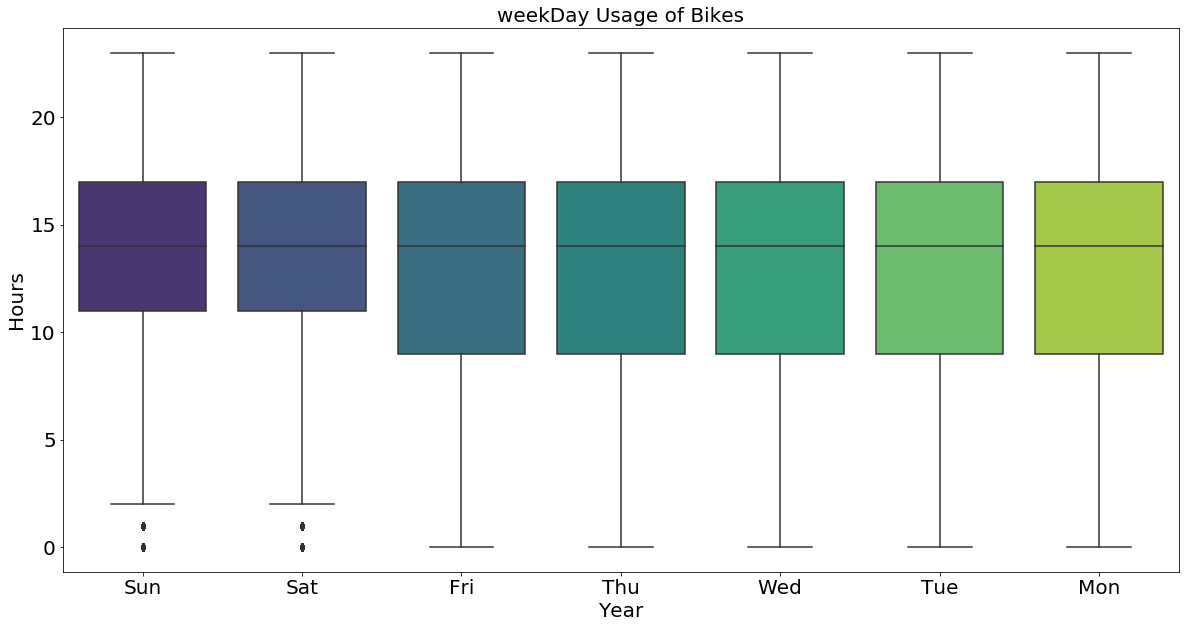

In [65]:
#plotting start_weekday and start_hour columns in order to find which weekday has used the ride 
#and at what time period the rides are taken in a week.
plt.figure(figsize=(20,10))
sb.boxplot(x="start_weekday", y="start_hour",palette="viridis",data=df_clean);
plt.title('weekDay Usage of Bikes',fontsize=20);
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.xlabel('Year',fontsize=20);
plt.ylabel('Hours',fontsize=20);

**Result:**
--
Upon visualisation the FordGoBike,in week days the usage of bikes are between 9 Am to 5 Pm and in weekends the usage of bike are between 11 Am to 5 Pm

**Distance travelled by the genders at a particular Hour**
--
**To find this result we are going to use the Boxplot for visualization:**

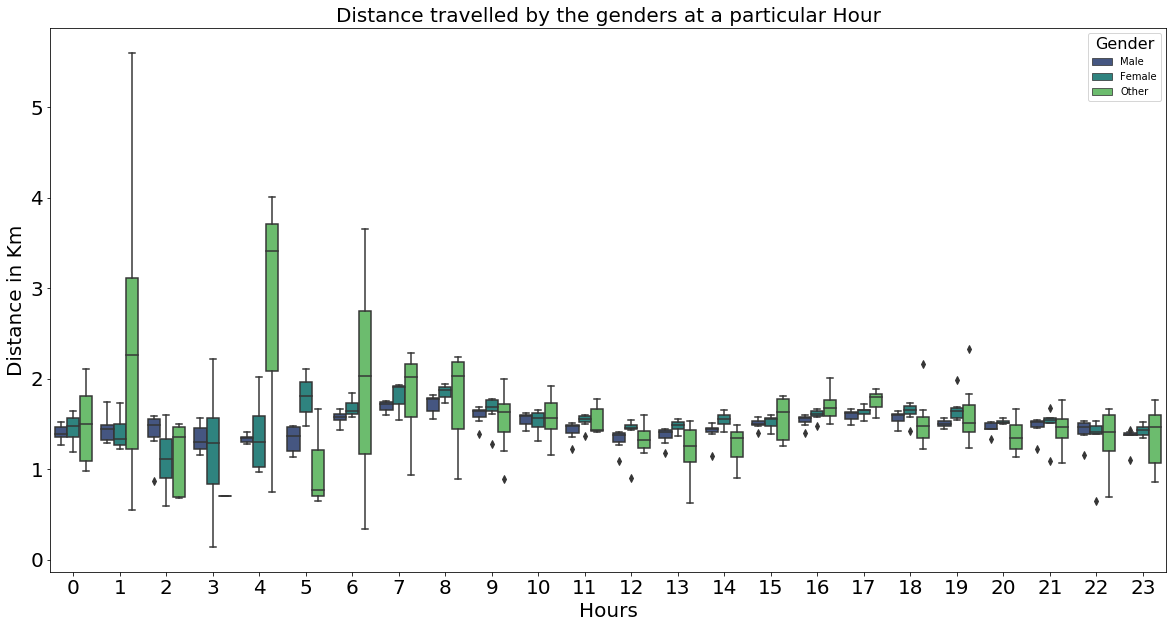

In [66]:
#grouping start_year_month,member_gender and start_hour columns and plotting the start_hour and distance_km with member_gender
#in order to find which gender has travelled a distance in km
plt.figure(figsize=(20,10))
gg=df_clean.groupby(["start_hour", "start_year_month", "member_gender"], as_index = False).mean()
ax=sb.boxplot(x = "start_hour", y = "distance_km", data =gg , palette = "viridis", hue = "member_gender");
plt.title('Distance travelled by the genders at a particular Hour',fontsize=20);
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.xlabel('Hours',fontsize=20);
plt.ylabel('Distance in Km',fontsize=20);
leg = ax.legend()
leg.set_title('Gender',prop={'size':16})
ax = plt.gca()

**Result:**
--
Upon visualisation the FordGoBike,the other genders have ride the maximum distance than male and female genders.

**Distance travelled by the Users**
--
**To find this result we are going to use the Boxplot for visualization:**

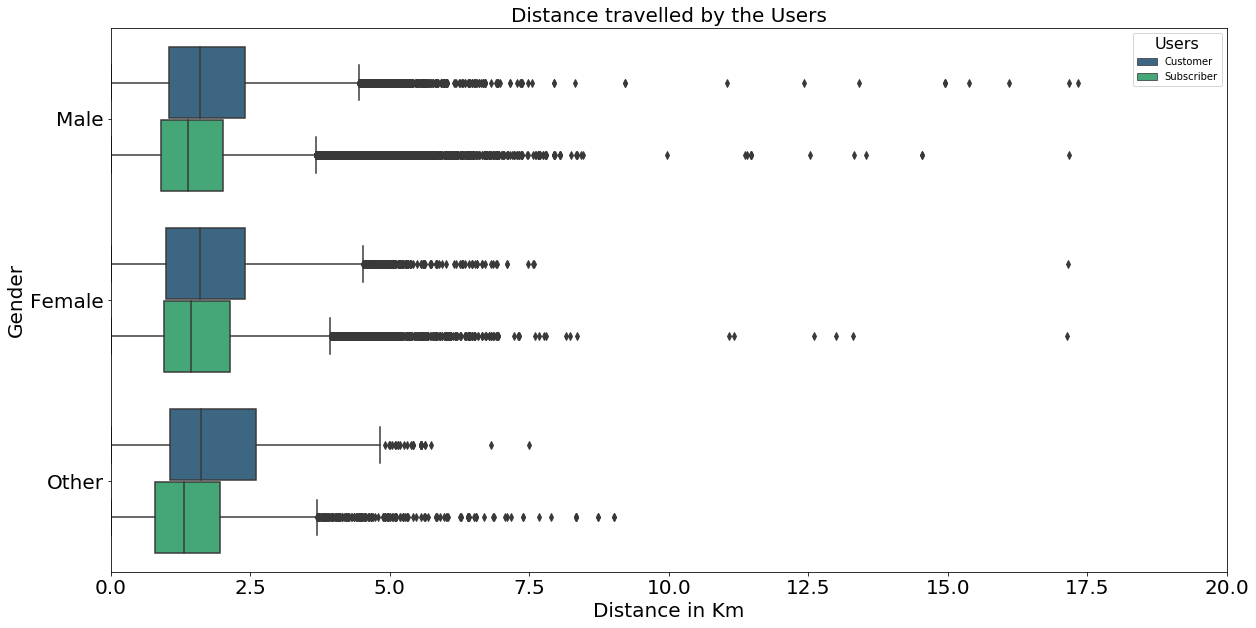

In [67]:
#plotting distance_km and member_gender columns with user_types in order to find which user has travelled a long distance.
plt.figure(figsize=(20,10))
ax=sb.boxplot(data=df_clean,x="distance_km", y="member_gender",hue='user_type',palette="viridis");
plt.title('Distance travelled by the Users',fontsize=20);
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.xlabel('Distance in Km',fontsize=20);
plt.ylabel('Gender',fontsize=20);
plt.xlim(0,20);
leg = ax.legend()
leg.set_title('Users',prop={'size':16})
ax = plt.gca()

**Result:**
--
Upon visualisation the FordGoBike,Customers have ride the bike for a maximum distance than Subscribers.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Percentage of subscribers is almost %90.3. Percentage of customers is almost %24.4. There are unique gender at the age 30.the minimum age is 30 and maximum ge goes to 70.most of the genders are subcribers.comparing the usage of bike between customer uses the bike more in the weekends and subscriber uses bike more in the weekdays.male rides more bikes that female riders.there are diffrent timimgs for weekdays and weekends.Customers have ride the bike for a maximum distance than Subscribers.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> ride between customers and subcribers. as there are more subcribers than customers but the cutomer rides falls down the subcribers.

**Multivariate:**
--

**HeatMap of the FordGoBike Data:**
--
**To find this result we are going to use the seaborns heatmap for visualization:**

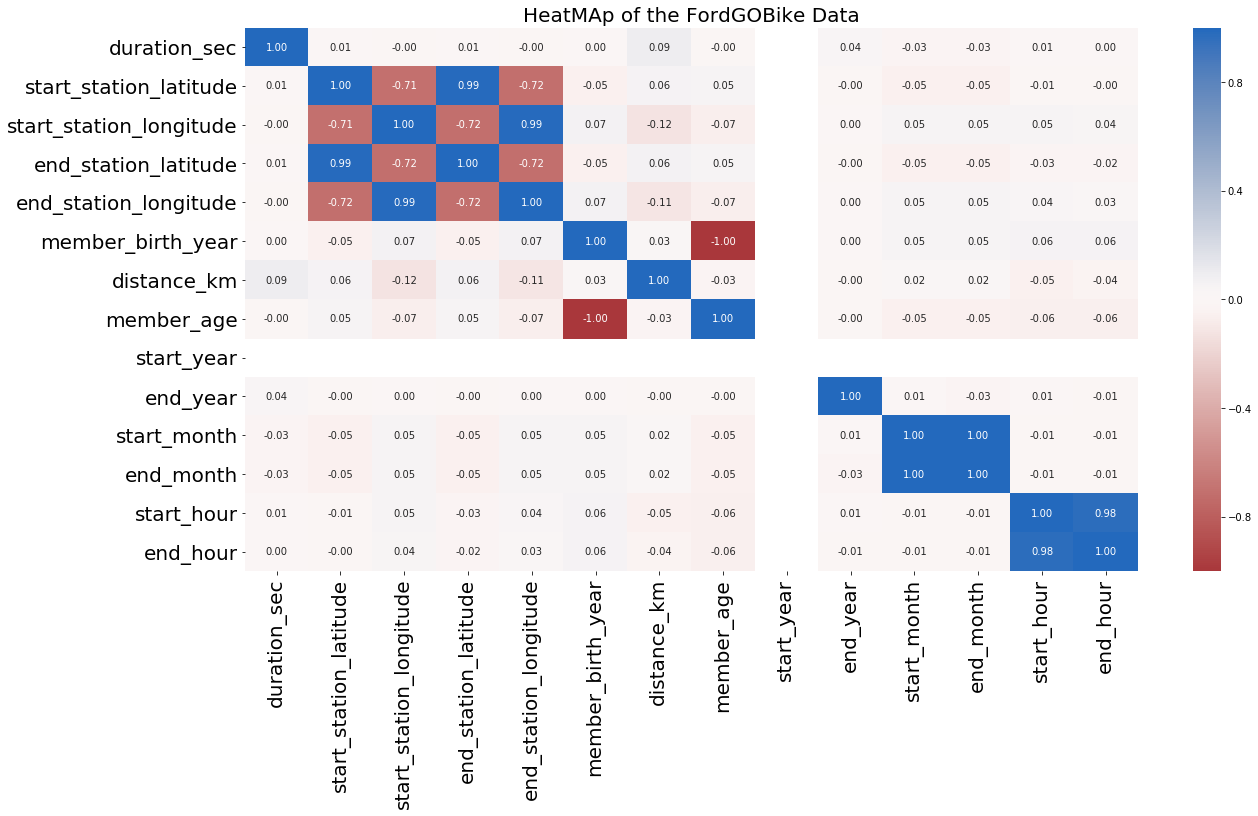

In [68]:
#here we are plotting all the numerical columns from the data and that is called heat map
plt.figure(figsize=(20,10));
sb.heatmap(df_clean.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);
plt.title('HeatMAp of the FordGOBike Data',fontsize=20);
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);


**PairGrid For numerial variables**
--
**To find this result we are going to use the seaborns pairgrid for visualization:**

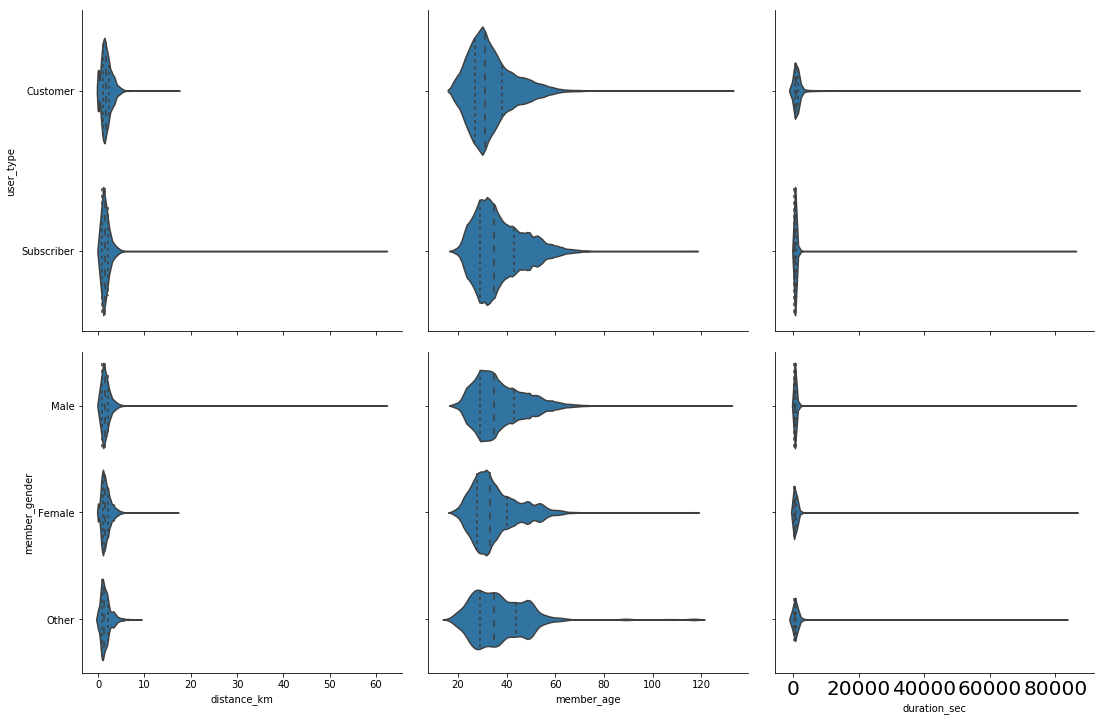

In [69]:
#here we are plotting the pairgrid plot to compare two categorical columns with three quantitative columns
g=sb.PairGrid(data = df_clean, x_vars = ['distance_km', 'member_age', 'duration_sec'],
                y_vars = ['user_type','member_gender'],size=5)
g.map(sb.violinplot, inner = 'quartile')
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> My investigation of bike hiring with 3 different variables such as distance_km, member_age, duration_sec. The multivariate exploration here showed me that people who are older than the others have more time to drive a bike rather than a young people.

### Were there any interesting or surprising interactions between features?

>It was interesting and also surprised because i did not expect that the ride of the customer would increase more than the subcribers as they where more in count.And looking at the age groups really suprised looking at the plot age peoples between 40-70 still ride the bike.

**Conclusion:**
--

> conclusion towards the FordGoBike is,subscribers is almost %88.15.customers is almost %11.85.People use this service on weekdays more than weekends.8am and 5pm are the peak hours for this service.Customers' rides seems increasedthan subscibers rides.Subscribers and customers trip distance were about the same, which is slightly more than one mile.
90% of bike rides take place on weekday.
>finally computative peoples for youngesters is 30-50 age peoples. youngesters need to competate with them. need in increase of gender where male dominates more than female.